# SNIa duration and time dilation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From https://arxiv.org/abs/astro-ph/0104382

In [4]:
# Supernova Cosmology Project data (Perlmutter et al. 1999)
scp_data = {
    'Name': ['1992bi', '1994F', '1994G', '1994H', '1994al', '1994am', '1994an', 
             '1995aq', '1995ar', '1995as', '1995at', '1995aw', '1995ax', '1995ay', 
             '1995az', '1995ba', '1996cf', '1996cg', '1996ci', '1996ck', '1996cl', 
             '1996cm', '1996cn', '1997F', '1997G', '1997H', '1997I', '1997J', 
             '1997K', '1997L', '1997N', '1997O', '1997P', '1997Q', '1997R', 
             '1997S', '1997ac', '1997af', '1997ai', '1997aj', '1997am', '1997ap'],
    'z': [0.458, 0.354, 0.425, 0.374, 0.420, 0.372, 0.378, 0.453, 0.465, 0.498, 
          0.655, 0.400, 0.615, 0.480, 0.450, 0.388, 0.570, 0.490, 0.495, 0.656, 
          0.828, 0.450, 0.430, 0.580, 0.763, 0.526, 0.172, 0.619, 0.592, 0.550, 
          0.180, 0.374, 0.472, 0.430, 0.657, 0.612, 0.320, 0.579, 0.450, 0.581, 
          0.416, 0.830],
    'w': [2.26, 0.96, 1.32, 1.19, 1.22, 1.22, 1.44, 1.27, 1.42, 1.64, 1.84, 
          1.62, 1.88, 1.36, 1.41, 1.36, 1.61, 1.58, 1.53, 1.51, 2.07, 1.33, 
          1.28, 1.62, 1.71, 1.38, 1.11, 1.63, 1.87, 1.51, 1.21, 1.40, 1.40, 
          1.36, 1.65, 1.90, 1.39, 1.39, 1.52, 1.49, 1.55, 1.88],
    'sigma_w': [0.34, 0.19, 0.24, 0.07, 0.13, 0.05, 0.23, 0.15, 0.21, 0.16, 
                0.12, 0.06, 0.18, 0.12, 0.10, 0.06, 0.11, 0.07, 0.07, 0.20, 
                0.53, 0.09, 0.10, 0.11, 0.30, 0.08, 0.04, 0.21, 0.30, 0.14, 
                0.02, 0.10, 0.06, 0.04, 0.12, 0.10, 0.03, 0.08, 0.20, 0.09, 
                0.07, 0.09],
    's': [1.55, 0.71, 0.92, 0.87, 0.86, 0.89, 1.04, 0.87, 0.97, 1.09, 1.11, 
          1.16, 1.16, 0.92, 0.97, 0.98, 1.03, 1.06, 1.02, 0.91, 1.13, 0.92, 
          0.89, 1.02, 0.97, 0.90, 0.94, 1.00, 1.18, 0.98, 1.03, 1.02, 0.95, 
          0.95, 0.99, 1.18, 1.05, 0.88, 1.04, 0.94, 1.10, 1.03],
    'sigma_s': [0.23, 0.14, 0.17, 0.05, 0.09, 0.04, 0.17, 0.10, 0.14, 0.11, 
                0.07, 0.04, 0.11, 0.08, 0.07, 0.04, 0.07, 0.05, 0.05, 0.12, 
                0.29, 0.06, 0.07, 0.07, 0.17, 0.05, 0.03, 0.13, 0.19, 0.09, 
                0.02, 0.07, 0.04, 0.03, 0.07, 0.06, 0.02, 0.05, 0.14, 0.06, 
                0.05, 0.05],
    'chi2_dof': [0.91, 1.74, 0.71, 1.59, 0.94, 1.73, 1.38, 1.21, 2.06, 0.57, 
                 0.80, 1.80, 1.17, 1.07, 0.63, 1.13, 1.06, 0.85, 1.21, 1.06, 
                 1.12, 0.80, 1.30, 0.86, 1.17, 0.86, 5.60, 0.94, 0.62, 2.57, 
                 1.72, 0.75, 1.30, 1.09, 1.06, 1.66, 0.79, 0.95, 0.82, 1.75, 
                 1.24, 1.04],
    'Comment': ['', '', 'Late R*', '', '', '', '', '', '', '', '', '', '', '', 
                '', '', '', '', '', '', 'U band', '', '', '', 'U band', '', 
                'V band', '', '', '', 'V band', 'Outlier', '', '', '', '', 
                '', '', '', '', '', 'U band']
}

# Create DataFrame for Supernova Cosmology Project
df_scp = pd.DataFrame(scp_data)

# Calan/Tololo data
calantololo_data = {
    'Name': ['1990O', '1990af', '1992P', '1992ae', '1992ag', '1992al', '1992aq', 
             '1992bc', '1992bg', '1992bh', '1992bl', '1992bo', '1992bp', '1992br', 
             '1992bs', '1993B', '1993O', '1993ag'],
    'z': [0.030, 0.050, 0.026, 0.075, 0.026, 0.014, 0.101, 0.020, 0.036, 0.045, 
          0.043, 0.018, 0.079, 0.088, 0.063, 0.071, 0.052, 0.050],
    'w': [1.09, 0.82, 1.15, 1.09, 1.14, 0.99, 1.04, 1.12, 1.09, 1.15, 0.92, 
          0.77, 1.03, 0.58, 1.05, 1.06, 0.99, 1.01],
    'sigma_w': [0.03, 0.02, 0.08, 0.09, 0.04, 0.02, 0.14, 0.01, 0.05, 0.05, 
                0.03, 0.01, 0.03, 0.04, 0.05, 0.09, 0.01, 0.04],
    's': [1.06, 0.78, 1.12, 1.02, 1.11, 0.98, 0.95, 1.09, 1.05, 1.10, 0.88, 
          0.76, 0.95, 0.53, 0.99, 0.99, 0.94, 0.96],
    'sigma_s': [0.03, 0.02, 0.08, 0.08, 0.04, 0.02, 0.13, 0.01, 0.05, 0.05, 
                0.03, 0.01, 0.03, 0.04, 0.05, 0.08, 0.01, 0.04],
    'chi2_dof': [1.53, 0.51, 1.45, 0.78, 2.15, 1.71, 0.65, 3.14, 1.68, 3.77, 
                 2.15, 1.29, 1.35, 1.39, 1.43, 1.14, 1.26, 1.16]
}

# Create DataFrame for Calan/Tololo data
df_calantololo = pd.DataFrame(calantololo_data)

# Add dataset identifier
df_scp['Dataset'] = 'Supernova Cosmology Project'
df_calantololo['Dataset'] = 'Calan/Tololo'
df_calantololo['Comment'] = ''  # Add empty comment column for consistency

# Combine both datasets
df_combined = pd.concat([df_scp, df_calantololo], ignore_index=True)

print("Supernova Cosmology Project data:")
print(f"Number of SNe: {len(df_scp)}")
print(df_scp.head())

print("\nCalan/Tololo data:")
print(f"Number of SNe: {len(df_calantololo)}")
print(df_calantololo.head())

print(f"\nCombined dataset: {len(df_combined)} supernovae")
print(f"Redshift range: {df_combined['z'].min():.3f} - {df_combined['z'].max():.3f}")

Supernova Cosmology Project data:
Number of SNe: 42
     Name      z     w  sigma_w     s  sigma_s  chi2_dof  Comment  \
0  1992bi  0.458  2.26     0.34  1.55     0.23      0.91            
1   1994F  0.354  0.96     0.19  0.71     0.14      1.74            
2   1994G  0.425  1.32     0.24  0.92     0.17      0.71  Late R*   
3   1994H  0.374  1.19     0.07  0.87     0.05      1.59            
4  1994al  0.420  1.22     0.13  0.86     0.09      0.94            

                       Dataset  
0  Supernova Cosmology Project  
1  Supernova Cosmology Project  
2  Supernova Cosmology Project  
3  Supernova Cosmology Project  
4  Supernova Cosmology Project  

Calan/Tololo data:
Number of SNe: 18
     Name      z     w  sigma_w     s  sigma_s  chi2_dof       Dataset Comment
0   1990O  0.030  1.09     0.03  1.06     0.03      1.53  Calan/Tololo        
1  1990af  0.050  0.82     0.02  0.78     0.02      0.51  Calan/Tololo        
2   1992P  0.026  1.15     0.08  1.12     0.08      1.45  Ca

## Data Description

The tables contain fit parameters for Type Ia supernovae from two major surveys:

**Supernova Cosmology Project** (Perlmutter et al. 1999):
- 42 Type Ia supernovae with good R-band photometry
- Parameters: redshift (z), stretch factor (w), shape parameter (s)
- Higher redshift sample (z ~ 0.17-0.83)

**Calan/Tololo Survey**:
- 18 nearby Type Ia supernovae 
- Lower redshift sample (z ~ 0.01-0.10)

**Column descriptions:**
- `z`: redshift
- `w`: stretch factor (time dilation parameter)
- `sigma_w`: uncertainty on w
- `s`: shape parameter 
- `sigma_s`: uncertainty on s
- `chi2_dof`: chi-squared per degree of freedom from fit

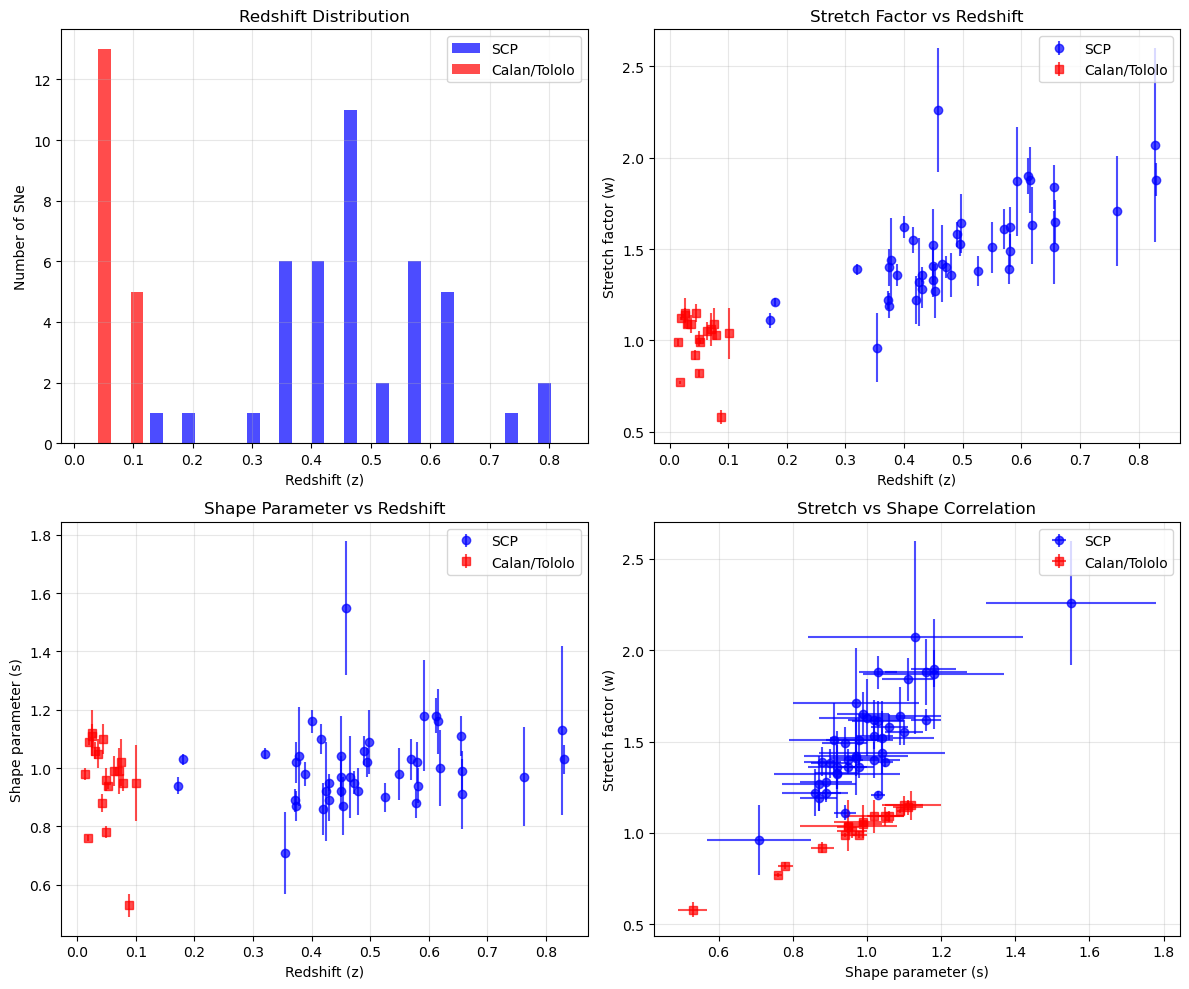


Dataset Summary:
Total supernovae: 60
SCP: 42 SNe, z = 0.172 - 0.830
Calan/Tololo: 18 SNe, z = 0.014 - 0.101

Mean stretch factor (w): 1.36 ± 0.33
Mean shape parameter (s): 0.99 ± 0.14

Correlation matrix:
          z         w         s
z  1.000000  0.837004  0.198437
w  0.837004  1.000000  0.695524
s  0.198437  0.695524  1.000000


In [5]:
# Basic analysis and visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Redshift distribution
axes[0,0].hist([df_scp['z'], df_calantololo['z']], bins=15, alpha=0.7, 
               label=['SCP', 'Calan/Tololo'], color=['blue', 'red'])
axes[0,0].set_xlabel('Redshift (z)')
axes[0,0].set_ylabel('Number of SNe')
axes[0,0].set_title('Redshift Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Stretch factor vs redshift
axes[0,1].errorbar(df_scp['z'], df_scp['w'], yerr=df_scp['sigma_w'], 
                   fmt='o', alpha=0.7, label='SCP', color='blue')
axes[0,1].errorbar(df_calantololo['z'], df_calantololo['w'], yerr=df_calantololo['sigma_w'], 
                   fmt='s', alpha=0.7, label='Calan/Tololo', color='red')
axes[0,1].set_xlabel('Redshift (z)')
axes[0,1].set_ylabel('Stretch factor (w)')
axes[0,1].set_title('Stretch Factor vs Redshift')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Shape parameter vs redshift
axes[1,0].errorbar(df_scp['z'], df_scp['s'], yerr=df_scp['sigma_s'], 
                   fmt='o', alpha=0.7, label='SCP', color='blue')
axes[1,0].errorbar(df_calantololo['z'], df_calantololo['s'], yerr=df_calantololo['sigma_s'], 
                   fmt='s', alpha=0.7, label='Calan/Tololo', color='red')
axes[1,0].set_xlabel('Redshift (z)')
axes[1,0].set_ylabel('Shape parameter (s)')
axes[1,0].set_title('Shape Parameter vs Redshift')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: w vs s correlation
axes[1,1].errorbar(df_scp['s'], df_scp['w'], xerr=df_scp['sigma_s'], yerr=df_scp['sigma_w'],
                   fmt='o', alpha=0.7, label='SCP', color='blue')
axes[1,1].errorbar(df_calantololo['s'], df_calantololo['w'], 
                   xerr=df_calantololo['sigma_s'], yerr=df_calantololo['sigma_w'],
                   fmt='s', alpha=0.7, label='Calan/Tololo', color='red')
axes[1,1].set_xlabel('Shape parameter (s)')
axes[1,1].set_ylabel('Stretch factor (w)')
axes[1,1].set_title('Stretch vs Shape Correlation')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nDataset Summary:")
print(f"Total supernovae: {len(df_combined)}")
print(f"SCP: {len(df_scp)} SNe, z = {df_scp['z'].min():.3f} - {df_scp['z'].max():.3f}")
print(f"Calan/Tololo: {len(df_calantololo)} SNe, z = {df_calantololo['z'].min():.3f} - {df_calantololo['z'].max():.3f}")
print(f"\nMean stretch factor (w): {df_combined['w'].mean():.2f} ± {df_combined['w'].std():.2f}")
print(f"Mean shape parameter (s): {df_combined['s'].mean():.2f} ± {df_combined['s'].std():.2f}")

# Correlation analysis
correlation = df_combined[['z', 'w', 's']].corr()
print(f"\nCorrelation matrix:")
print(correlation)

## Power law fit

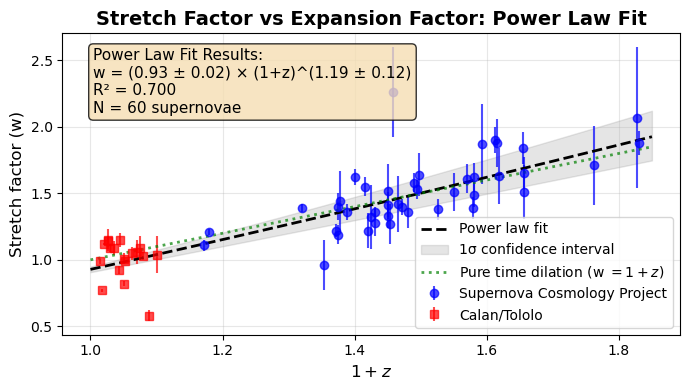

In [16]:
#| label: SNIa_stretch

# Import additional modules for fitting
from scipy import stats
from scipy.optimize import curve_fit

# Power law function for fitting: w = a * (1+z)^b
def power_func(x, a, b):
    return a * x ** b

# Combine data for fitting - use (1+z) instead of z
z_all = df_combined['z'].values
one_plus_z_all = 1 + z_all  # Transform to (1+z)
w_all = df_combined['w'].values
sigma_w_all = df_combined['sigma_w'].values

# Perform weighted power law fit with (1+z)
# Initial guess: a=1, b=1 (pure time dilation)
initial_guess = [1.0, 1.0]
popt, pcov = curve_fit(power_func, one_plus_z_all, w_all, 
                       sigma=sigma_w_all, absolute_sigma=False, 
                       p0=initial_guess)
a_param, b_param = popt
a_err, b_err = np.sqrt(np.diag(pcov))

# Calculate R-squared and other statistics
w_fit = power_func(one_plus_z_all, a_param, b_param)
ss_res = np.sum((w_all - w_fit) ** 2)
ss_tot = np.sum((w_all - np.mean(w_all)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Create the plot
plt.figure(figsize=(7, 4))

# Plot SCP data
scp_mask = df_combined['Dataset'] == 'Supernova Cosmology Project'
plt.errorbar(1 + df_combined[scp_mask]['z'], df_combined[scp_mask]['w'], 
             yerr=df_combined[scp_mask]['sigma_w'], 
             fmt='o', alpha=0.7, label='Supernova Cosmology Project', 
             color='blue', markersize=6)

# Plot Calan/Tololo data
ct_mask = df_combined['Dataset'] == 'Calan/Tololo'
plt.errorbar(1 + df_combined[ct_mask]['z'], df_combined[ct_mask]['w'], 
             yerr=df_combined[ct_mask]['sigma_w'], 
             fmt='s', alpha=0.7, label='Calan/Tololo', 
             color='red', markersize=6)

# Plot the power law fit
one_plus_z_fit = np.linspace(1.0, 1.85, 100)
w_fit_line = power_func(one_plus_z_fit, a_param, b_param)
plt.plot(one_plus_z_fit, w_fit_line, 'k--', linewidth=2, label='Power law fit')

# Add confidence interval (1-sigma) - approximate
w_fit_upper = power_func(one_plus_z_fit, a_param + a_err, b_param + b_err)
w_fit_lower = power_func(one_plus_z_fit, a_param - a_err, b_param - b_err)
plt.fill_between(one_plus_z_fit, w_fit_lower, w_fit_upper, alpha=0.2, color='gray', 
                 label='1σ confidence interval')

# Add theoretical expectation (pure time dilation: w = 1+z)
w_theory = one_plus_z_fit  # w = (1+z) for pure time dilation
plt.plot(one_plus_z_fit, w_theory, 'g:', linewidth=2, alpha=0.7, 
         label='Pure time dilation (w $=1+z$)')

# Formatting
plt.xlabel('$1 + z$', fontsize=12)
plt.ylabel('Stretch factor (w)', fontsize=12)
plt.title('Stretch Factor vs Expansion Factor: Power Law Fit', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add fit results as text on the plot
textstr = f'''Power Law Fit Results:
w = ({a_param:.2f} ± {a_err:.2f}) × (1+z)^({b_param:.2f} ± {b_err:.2f})
R² = {r_squared:.3f}
N = {len(z_all)} supernovae'''

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [17]:
# Print detailed results
print("=" * 60)
print("POWER LAW FIT RESULTS: w = a × (1+z)^b")
print("=" * 60)
print(f"Parameter a:   {a_param:.4f} ± {a_err:.4f}")
print(f"Parameter b:   {b_param:.4f} ± {b_err:.4f}")
print(f"R-squared:     {r_squared:.4f}")
print(f"Data points:   {len(z_all)} supernovae")
print("=" * 60)

# Physical interpretation
print("\nPhysical Interpretation:")
print(f"• At z=0 (1+z=1): w = {a_param:.2f} ± {a_err:.2f}")
print(f"• Power law exponent: b = {b_param:.2f} ± {b_err:.2f}")

if abs(b_param - 1.0) < 2 * b_err:
    print("• ✓ Exponent consistent with b=1 (pure time dilation)")
elif abs(b_param - 1.0) < 3 * b_err:
    print("• ⚠ Exponent marginally consistent with b=1 (within 3σ)")
else:
    print("• ✗ Exponent significantly different from b=1")

if abs(a_param - 1.0) < 2 * a_err:
    print("• ✓ Normalization consistent with a=1")
elif abs(a_param - 1.0) < 3 * a_err:
    print("• ⚠ Normalization marginally consistent with a=1")
else:
    print("• ✗ Normalization significantly different from a=1")

# Theoretical expectation
print(f"\nTheoretical expectation:")
print(f"• Pure cosmological time dilation: w = (1+z)^1")
print(f"• Expected: a = 1, b = 1")
print(f"• Observed: a = {a_param:.2f} ± {a_err:.2f}, b = {b_param:.2f} ± {b_err:.2f}")

# Combined test for pure time dilation
chi2_theory = ((a_param - 1.0)/a_err)**2 + ((b_param - 1.0)/b_err)**2
print(f"• Combined χ² test for (a=1, b=1): {chi2_theory:.2f}")
if chi2_theory < 4.0:  # 2 degrees of freedom, 95% confidence
    print("• ✓ Consistent with pure cosmological time dilation (95% CL)")
elif chi2_theory < 9.0:  # 99% confidence
    print("• ⚠ Marginally consistent with pure cosmological time dilation")
else:
    print("• ✗ Inconsistent with pure cosmological time dilation")

POWER LAW FIT RESULTS: w = a × (1+z)^b
Parameter a:   0.9283 ± 0.0209
Parameter b:   1.1861 ± 0.1207
R-squared:     0.7005
Data points:   60 supernovae

Physical Interpretation:
• At z=0 (1+z=1): w = 0.93 ± 0.02
• Power law exponent: b = 1.19 ± 0.12
• ✓ Exponent consistent with b=1 (pure time dilation)
• ✗ Normalization significantly different from a=1

Theoretical expectation:
• Pure cosmological time dilation: w = (1+z)^1
• Expected: a = 1, b = 1
• Observed: a = 0.93 ± 0.02, b = 1.19 ± 0.12
• Combined χ² test for (a=1, b=1): 14.13
• ✗ Inconsistent with pure cosmological time dilation


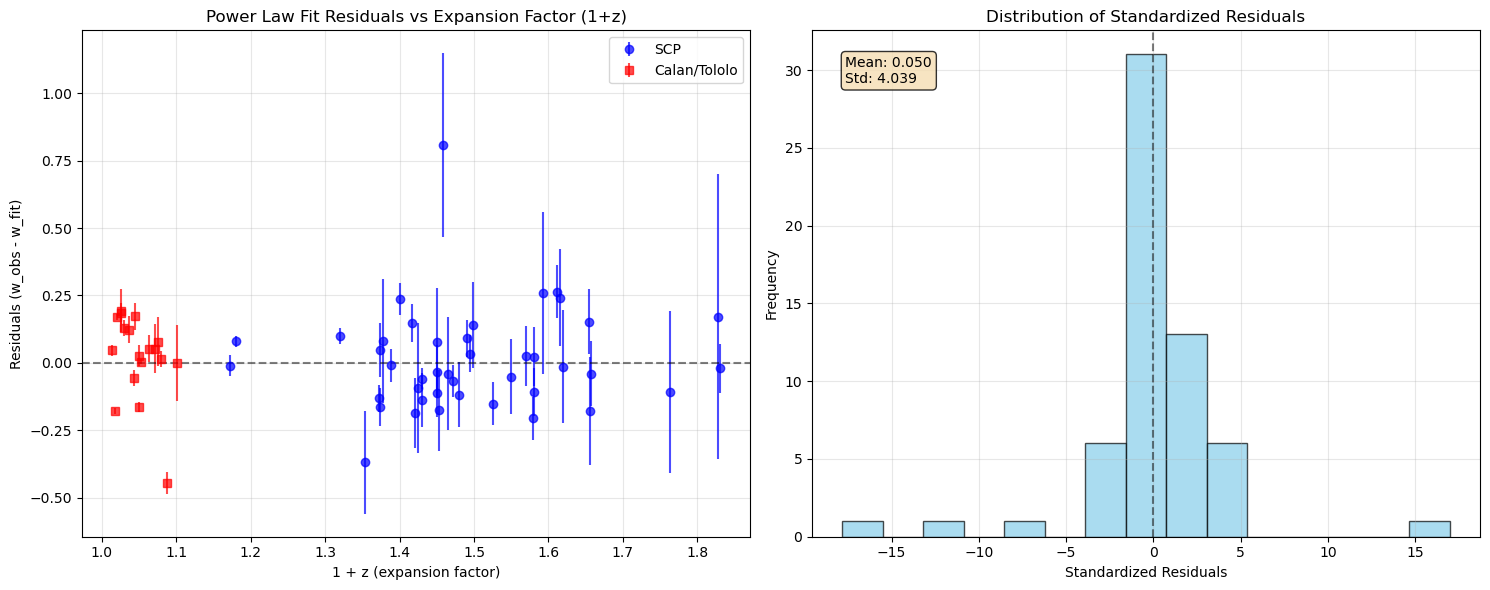

GOODNESS OF FIT ANALYSIS - POWER LAW
Chi-squared:         979.17
Degrees of freedom:  58
Reduced chi-squared: 16.88
Mean residual:       0.0132
RMS residual:        0.1786
✗ Poor fit (reduced χ² > 3.0)

COMPARISON WITH COSMOLOGICAL TIME DILATION:
Individual parameter tests:
Test H₀: a = 1.0
  t-statistic: -14.09
  Deviation: 14.09σ
Test H₀: b = 1.0 (pure time dilation)
  t-statistic: 6.33
  Deviation: 6.33σ

Combined test H₀: (a=1, b=1)
  χ² statistic: 238.63
  Degrees of freedom: 2
  ✗ Parameters inconsistent with pure time dilation

COMPARISON OF MODELS:
Power law fit:      χ²/dof = 16.88
Pure time dilation: χ²/dof = 19.74
→ Power law fit provides better description of data


In [11]:
# Analysis of fit residuals with power law fit
residuals = w_all - power_func(one_plus_z_all, a_param, b_param)
standardized_residuals = residuals / sigma_w_all

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Residuals vs (1+z)
ax1.errorbar(one_plus_z_all[scp_mask], residuals[scp_mask], yerr=sigma_w_all[scp_mask], 
             fmt='o', alpha=0.7, label='SCP', color='blue')
ax1.errorbar(one_plus_z_all[ct_mask], residuals[ct_mask], yerr=sigma_w_all[ct_mask], 
             fmt='s', alpha=0.7, label='Calan/Tololo', color='red')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.set_xlabel('1 + z (expansion factor)')
ax1.set_ylabel('Residuals (w_obs - w_fit)')
ax1.set_title('Power Law Fit Residuals vs Expansion Factor (1+z)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Histogram of standardized residuals
ax2.hist(standardized_residuals, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Standardized Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Standardized Residuals')
ax2.grid(True, alpha=0.3)

# Add statistics to histogram
mean_resid = np.mean(standardized_residuals)
std_resid = np.std(standardized_residuals)
ax2.text(0.05, 0.95, f'Mean: {mean_resid:.3f}\nStd: {std_resid:.3f}', 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Chi-squared test
chi_squared = np.sum(standardized_residuals**2)
n_params = 2  # a and b parameters
dof = len(z_all) - n_params
reduced_chi_squared = chi_squared / dof

print("=" * 60)
print("GOODNESS OF FIT ANALYSIS - POWER LAW")
print("=" * 60)
print(f"Chi-squared:         {chi_squared:.2f}")
print(f"Degrees of freedom:  {dof}")
print(f"Reduced chi-squared: {reduced_chi_squared:.2f}")
print(f"Mean residual:       {np.mean(residuals):.4f}")
print(f"RMS residual:        {np.sqrt(np.mean(residuals**2)):.4f}")

if reduced_chi_squared < 1.5:
    print("✓ Good fit (reduced χ² < 1.5)")
elif reduced_chi_squared < 3.0:
    print("⚠ Acceptable fit (1.5 < reduced χ² < 3.0)")
else:
    print("✗ Poor fit (reduced χ² > 3.0)")

print("=" * 60)

# Additional analysis: comparison with theoretical expectation
print("\nCOMPARISON WITH COSMOLOGICAL TIME DILATION:")
print("=" * 60)

# Test individual parameters
print("Individual parameter tests:")
t_stat_a = (a_param - 1.0) / a_err
t_stat_b = (b_param - 1.0) / b_err

print(f"Test H₀: a = 1.0")
print(f"  t-statistic: {t_stat_a:.2f}")
print(f"  Deviation: {abs(a_param - 1.0)/a_err:.2f}σ")

print(f"Test H₀: b = 1.0 (pure time dilation)")
print(f"  t-statistic: {t_stat_b:.2f}")
print(f"  Deviation: {abs(b_param - 1.0)/b_err:.2f}σ")

# Combined test
print(f"\nCombined test H₀: (a=1, b=1)")
print(f"  χ² statistic: {chi2_theory:.2f}")
print(f"  Degrees of freedom: 2")

if chi2_theory < 4.0:  # 95% confidence level for 2 dof
    print("  ✓ Parameters consistent with pure time dilation (95% CL)")
elif chi2_theory < 9.0:  # 99% confidence level
    print("  ⚠ Parameters marginally consistent (99% CL)")
else:
    print("  ✗ Parameters inconsistent with pure time dilation")

print("=" * 60)

# Comparison with pure time dilation model
print("\nCOMPARISON OF MODELS:")
print("=" * 60)

# Calculate residuals for pure time dilation (w = 1+z)
w_theory_all = one_plus_z_all
residuals_theory = w_all - w_theory_all
chi2_theory_total = np.sum((residuals_theory / sigma_w_all)**2)
dof_theory = len(z_all) - 0  # no fitted parameters
reduced_chi2_theory = chi2_theory_total / dof_theory

print(f"Power law fit:      χ²/dof = {reduced_chi_squared:.2f}")
print(f"Pure time dilation: χ²/dof = {reduced_chi2_theory:.2f}")

if reduced_chi_squared < reduced_chi2_theory:
    print("→ Power law fit provides better description of data")
else:
    print("→ Pure time dilation model is competitive")

print("=" * 60)